<a href="https://colab.research.google.com/github/sbondil/Visualizacion-de-datos---AG1/blob/master/07MBIG_AG3_Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Visualization AG3
---



#Import des modules

In [0]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

#Adquirir, Explotar, Consultar Datos

##Adquirir Datos

In [0]:
#Cargamos el data set de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))


## Explorar datos

###Info del data set

In [8]:
#Informacion del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
tarifa         891 non-null float64
embarked       889 non-null object
clase          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
ERROR! Session/line number was not unique in database. History logging moved to new session 59


###Info del data set - Rename

In [0]:
#Renombra la columna class=clase y fare=tarifa
titanic.rename(columns={'class': 'clase'}, inplace=True)
titanic.rename(columns={'fare': 'tarifa'}, inplace=True)

In [25]:
#Muestra los valores distintos para class(clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [26]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


###Info del data set - Add Column

In [0]:
#Añadimos nuevas columnas: is_old, is_baby
###############################################
def is_old_func(row):
 return row['age'] > 60 #Renvoie True si condition OK, False sinon

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

#Otra forma de definir una nueva columna
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [28]:
titanic['is_old'].unique()

array([False,  True])

In [29]:
titanic['is_baby'].unique()

array([False,  True])

###Info del data set - Add Variable

In [0]:
#Define una variable numérica: class_num
def class_num_func(row):
 Clase={'Third':3,'First':1,'Second':2}
 return Clase[row.clase] # row.clase => 'Third','First','Second' & Clase['Third']=> 3, Clase['Second'] => 2, ...

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [15]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


##Consulta de datos con condiciones

In [31]:
#Consulta con condiciones (panda)
titanic[
(titanic.sex == 'female')
&(titanic['clase'].isin(['First', 'Third']))
&(titanic.age > 45 )
&(titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


#Distribucion de datos




##Distribucion de las clases

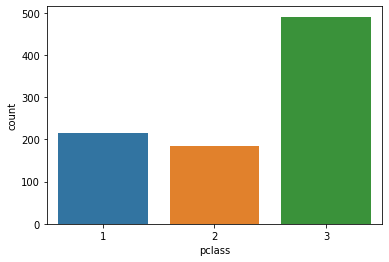

In [17]:
#Distribución de las clases (seaborn)
sns.countplot(x="pclass", data=titanic)

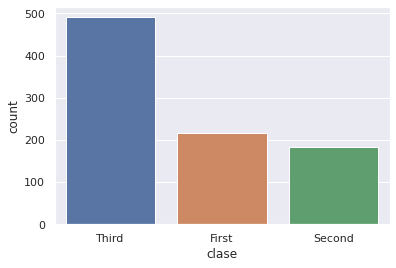

In [32]:
#Distribución de las clases (seaborn)
sns.countplot(x="clase", data=titanic)

##Distribucion por edad

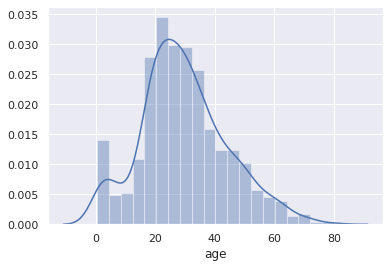

In [33]:
#Distribucion de la edad (age)
sns.distplot(titanic.age.dropna())
plt.show()

##Distribucion de la edad por sexo y clase

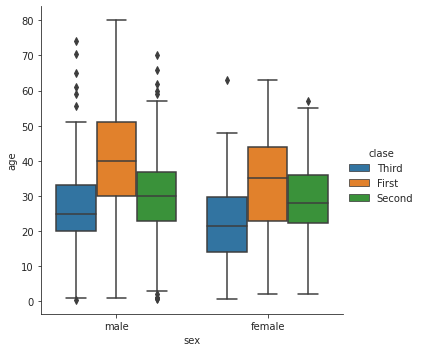

In [19]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
 ax = sns.catplot("sex", "age", "clase" , data=titanic, kind="box")
# Borde superior :Q3
# Linea interior : media
# Borde inferior : Q1
# Linea arriba : Max
# Linea abajo : min
# Puntos : outliers => segun algo: +/- 1.5 RIC (RIC = Q3-Q1)

##Distribución cruzada de edad y tarifa


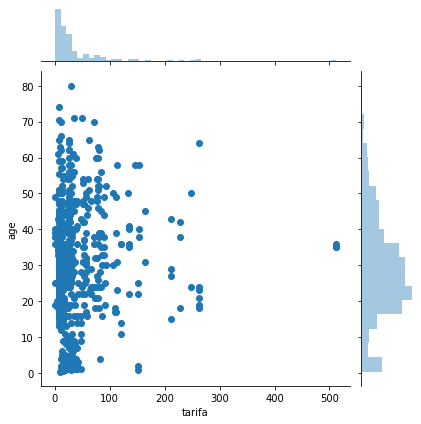

In [20]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

##Distribución de la edad según la categorías: survived, clase

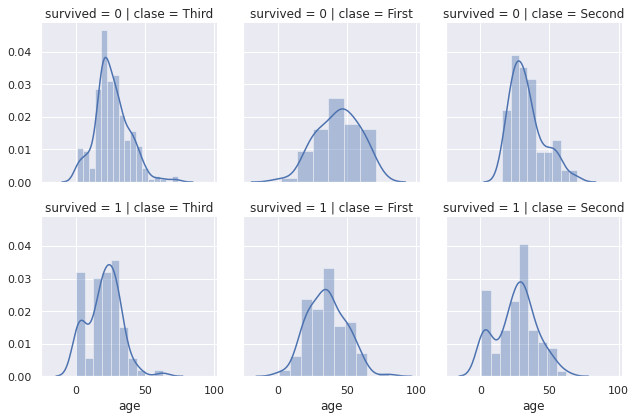

In [21]:
#Cambiamos el font
sns.set(font_scale=1) 
g = sns.FacetGrid(titanic, row='survived', 
col='clase')
g.map(sns.distplot, "age")
plt.show()

##Distribución de la edad según la categorías: survived, clase

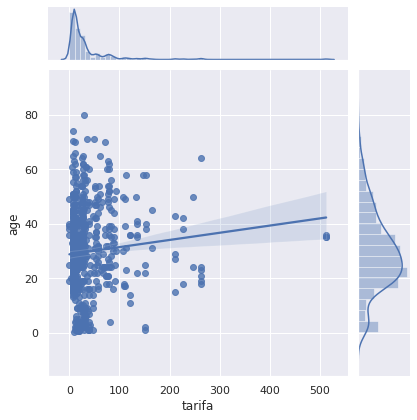

In [35]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
#sns.jointplot(data=titanic, x='age', y='tarifa', 
sns.jointplot(data=titanic, y='age', x='tarifa',
kind='reg', color='b')
plt.show()

##Mapa de calor

Text(0.5, 1.0, 'titanic.corr()')

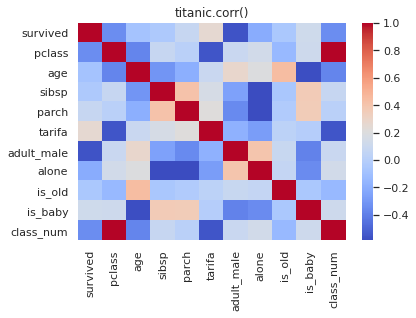

In [36]:
# Mapa de calor de correlaciones 
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')
#sibsp : si viajas con ninos

##Diagramas de dispersión de parejas de variables quantitativas



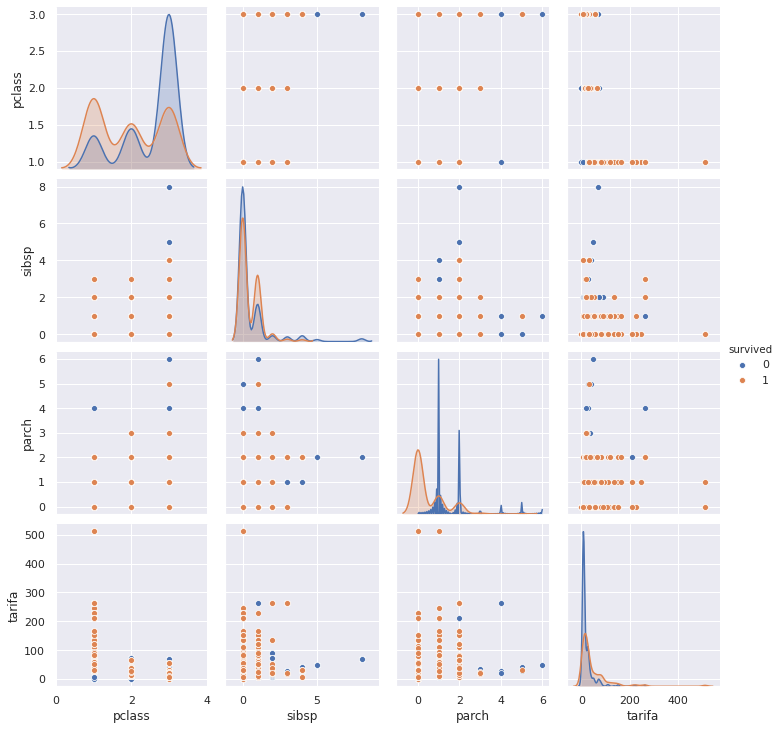

In [37]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

###DataSet Iris

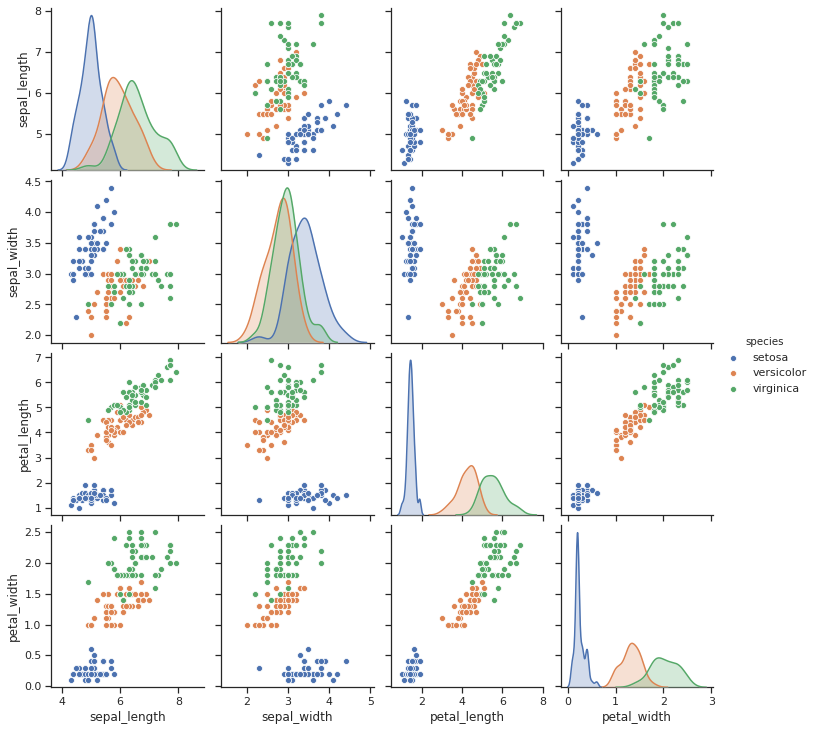

In [38]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
#Carga el data set
df = sns.load_dataset("iris")
#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")